# Defect Detection in PCB Images


Este código em Python realiza a detecção de defeitos em imagens de PCB (Placas de Circuito Impresso). Ele começa carregando duas imagens, uma original e outra com defeito, normalizando seus valores de pixel. Em seguida, alinha as imagens deslocando a imagem com defeito e calcula a diferença entre a imagem original e a imagem alinhada. Essas diferenças são exibidas graficamente. A seguir, uma imagem binária destaca os defeitos, aplicando um limite predefinido e removendo artefatos próximos às bordas. Por fim, as imagens de diferença e a imagem binária são salvas como arquivos PNG. 


O código é útil para identificar e destacar defeitos em PCBs após o alinhamento das imagens.

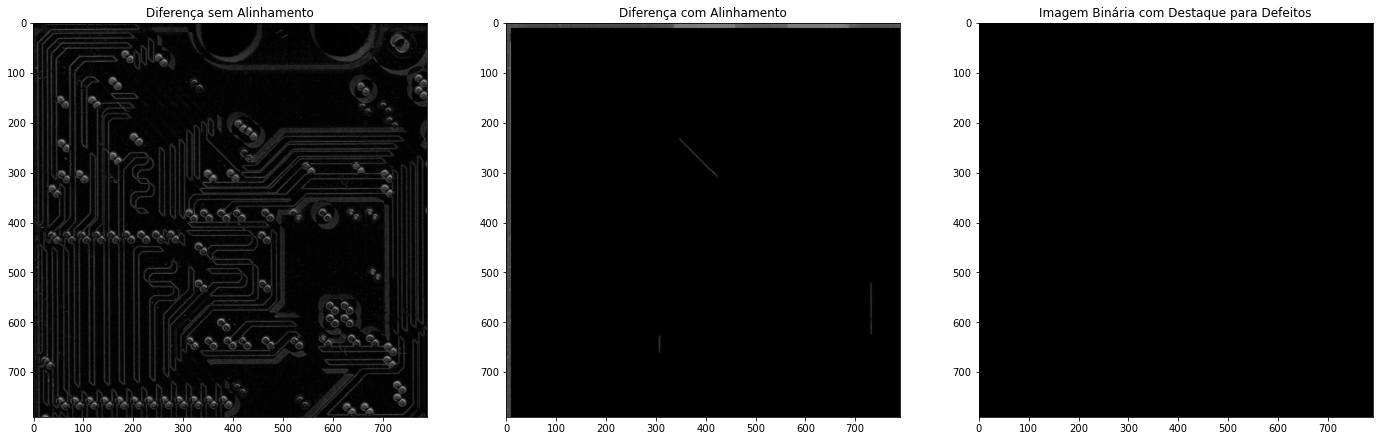

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregando as imagens de teste
origImg = cv2.imread('pcbCropped.png').astype(np.float32) / 255.0  # Carrega a imagem original e normaliza os valores de pixel
defectImg = cv2.imread('pcbCroppedTranslatedDefected.png').astype(np.float32) / 255.0  # Carrega a imagem com defeito e a normaliza (deslocada 10 pixels para a direita e 10 pixels para baixo)

# Realizando o deslocamento para alinhar as imagens
xShift = 10
yShift = 10
registImg = np.zeros_like(defectImg)  # Cria uma imagem vazia com as mesmas dimensões da imagem com defeito
registImg[yShift:, xShift:] = defectImg[:-yShift, :-xShift]  # Desloca a imagem com defeito para alinhá-la com a imagem original

# Calculando as imagens de diferença
diffImg1 = np.abs(origImg - defectImg)  # Calcula a diferença entre a imagem original e a imagem com defeito desalinhada
diffImg2 = np.abs(origImg - registImg)  # Calcula a diferença entre a imagem original e a imagem com defeito alinhada

# Exibindo as imagens de diferença
plt.figure(figsize=(24, 12))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(diffImg1, cv2.COLOR_BGR2RGB))
plt.title('Diferença sem Alinhamento')  # Título da primeira imagem de diferença

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(diffImg2, cv2.COLOR_BGR2RGB))
plt.title('Diferença com Alinhamento')  # Título da segunda imagem de diferença (alinhada)

# Criando uma imagem binária destacando os defeitos
threshold = 0.15  # Define um limite para distinguir os defeitos
bwImg = (diffImg2 > threshold).astype(np.uint8)  # Converte a imagem de diferença alinhada em binária com base no limite
height, width = bwImg.shape[:2]
border = int(0.05 * width)
borderMask = np.zeros_like(bwImg)
borderMask[border:height-border, border:width-border] = 1  # Cria uma máscara para remover artefatos próximos às bordas
bwImg = bwImg * borderMask

plt.subplot(1, 3, 3)
plt.imshow(bwImg, cmap='gray')
plt.title('Imagem Binária com Destaque para Defeitos')  # Título da imagem binária destacando os defeitos

# Salvando as imagens
cv2.imwrite('Defect_Detection_diff.png', (diffImg1 * 255).astype(np.uint8))  # Salva a imagem de diferença não alinhada
cv2.imwrite('Defect_Detection_diffRegisted.png', (diffImg2 * 255).astype(np.uint8))  # Salva a imagem de diferença alinhada
cv2.imwrite('Defect_Detection_bw.png', bwImg * 255)  # Salva a imagem binária com destaque para defeitos

plt.show()  # Exibe as figuras com as imagens
